## Task2 - This task is Submit By Mukul Saluja

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Importing the Dataset

In [2]:
df=pd.read_csv("Scores.csv")

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Expolatory Data analysis

In [4]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


From the above we can clearly see that both are highly correlated so there is linear relationship between them we can confirm 
this by plotting a graph

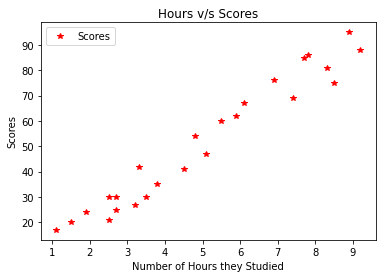

In [8]:
df.plot(x="Hours",y="Scores",c="r",style="*")
plt.xlabel("Number of Hours they Studied")
plt.ylabel("Scores")
plt.title("Hours v/s Scores")
plt.show()

### Distributions

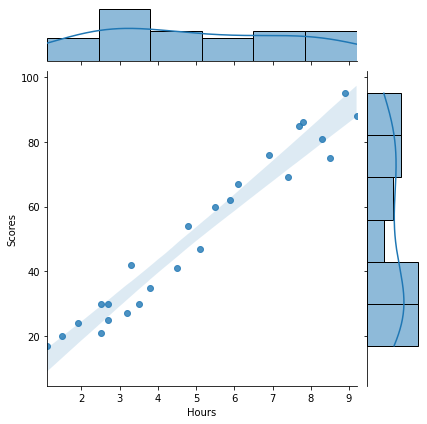

In [9]:
sns.jointplot(df["Hours"],df["Scores"],kind="reg")
plt.show()

## Seprating the Data into dependent and independent variables

In [10]:
X=df["Hours"].values.reshape(-1,1)
y=df["Scores"].values.reshape(-1,1)

## Splitting the Data into Training and Test Data

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Training the model using Simple Linear regression Algorithm

### Calculating the parameters of Simple Linear regression which is the form y=B0+B1*x(where B0 is intercept and B1 is slope)

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

## Making prediction for Traning set to compare it with actual values

In [14]:
y_train_pred=lin_reg.predict(X_train)

## Visualize the Training set results

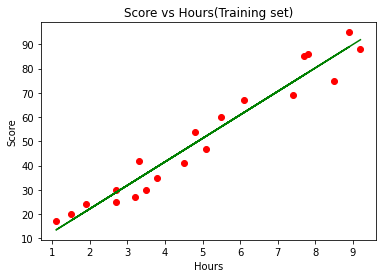

In [15]:
plt.scatter(X_train, y_train, c = 'r')
plt.plot(X_train, y_train_pred, color = 'g')
plt.title('Score vs Hours(Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

# Parameterss that our model  has learned to fit the training Data

In [16]:
print("Intercept is :- ",lin_reg.intercept_)
print("Slope is :- ",lin_reg.coef_[0])

Intercept is :-  [2.82689235]
Slope is :-  [9.68207815]


## Make predictions for test set to compare the predicted values with the actual values

In [17]:
y_pred_test=lin_reg.predict(X_test)

In [18]:
pd.DataFrame({ 'Actual_value': list(y_test.reshape(-1,1)),
                'Predicted_value':list(y_pred_test.reshape(-1,1))})

,Actual_value,Predicted_value
0,[81],[83.18814103588203]
1,[30],[27.03208774003898]
2,[21],[27.03208774003898]
3,[76],[69.63323161964405]
4,[62],[59.951153465188355]


## Test set results visualization

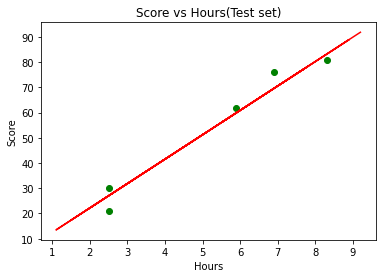

In [19]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train,y_train_pred, color = 'red')
plt.title('Score vs Hours(Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

## Checking the error

In [20]:
from sklearn.metrics import mean_absolute_error,r2_score  
print('Mean Absolute Error:', 
      mean_absolute_error(y_test, y_pred_test)) 
print(' r2 Score: ', r2_score(y_test, y_pred_test))

Mean Absolute Error: 3.9207511902099244
 r2 Score:  0.9678055545167994


## Scores Prediction for Student who studying 9.25 Hours

In [21]:
Hours = 9.25
prediction = lin_reg.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(prediction[0][0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494
